# Nelder–Mead method
Using Himmelblau's function 
$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2.
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image as IPImage
import imageio
from PIL import Image
import os

np.random.seed(24)


In [2]:
def him_fun(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

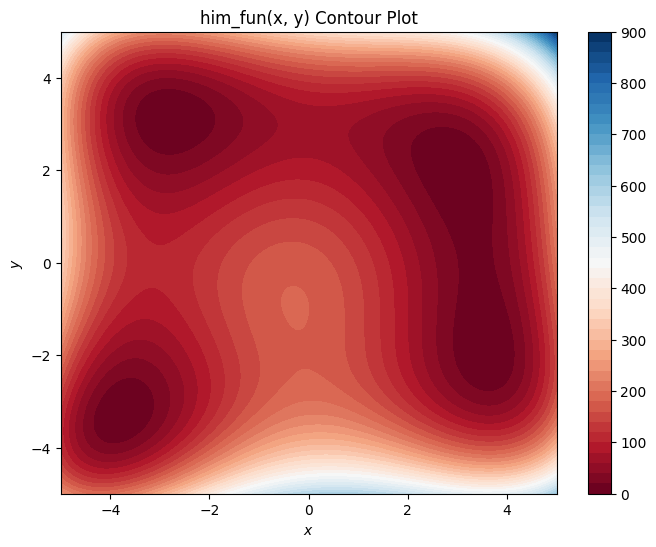

In [3]:
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)

X, Y = np.meshgrid(x_vals, y_vals)

Z = him_fun(X, Y)

plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='RdBu')
plt.colorbar(cp)

plt.title("him_fun(x, y) Contour Plot")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

def show_plot(points):
    # Create the contour plot
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=150, cmap='RdBu')
    plt.colorbar(cp)

    # Set titles and labels
    plt.title("him_fun(x, y) Contour Plot")
    plt.xlabel("$x$")
    plt.ylabel("$y$")

    # Plot the simplex points
    plt.scatter(points[:, 0], points[:, 1], color='red')

    # Plot a line connecting the points and close the polygon
    points = np.vstack([points, points[0]]).copy()  # Add the first point at the end to close the polygon
    plt.plot(points[:, 0], points[:, 1], color='black', linestyle='-', linewidth=1)

    # Remove the legend by not calling plt.legend()
    plt.show()

1. Order: Order points according to ascending function values - with $v_1$ best point, $v_{d+1}$ worst point.
2. Compute centroid without worst point $v' = \frac{1}{d} \sum_{i=1}^{d} v_i$
3. Reflection: Compute reflection point $v_r = v' + \rho(v' - v_{d+1})$ with $\rho > 0$.



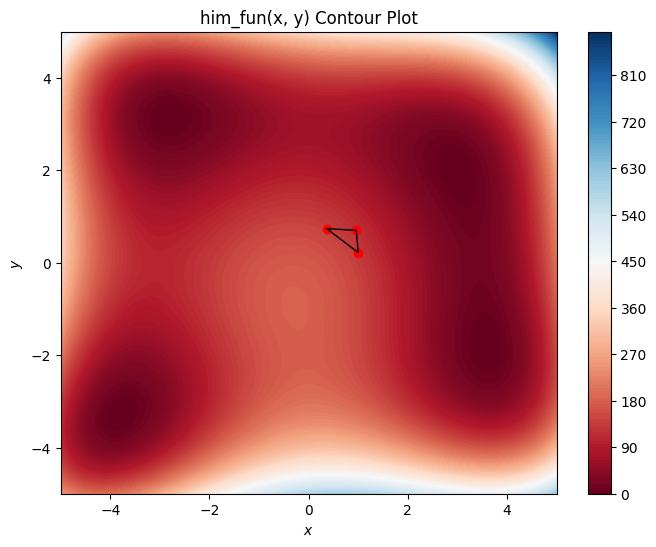

In [4]:
simplex_points = np.random.rand(3,2)

p = 1 #normal
ex = 2 # expandtion
co = 0.5 # contraction 

show_plot(simplex_points)

Distinguish three cases:

Case 1: $ f(v_1) \leq f(v_r) < f(v_d) $ 
$\Rightarrow$ Accept $ v_r $ and discard $ v_{d+1} $

Case 2: $ f(v_r) < f(v_1) $ 
Expansion: 
$$
v_e = \bar{v} + \chi(v_r - \bar{v}), \quad \chi > 1
$$

We discard $ v_{d+1} $ and accept the better of $ v_r $ and $ v_e $.

Note: Default value for expansion coefficient: $ \chi = 2 $

Case 3: $ f(v_r) \geq f(v_d) $ 
$\Rightarrow$ Contraction: 
$$
v_c = \bar{v} + \gamma(v_{d+1} - \bar{v}), \quad 0 < \gamma \leq \frac{1}{2}
$$

If $ f(v_c) < f(v_{d+1}) $, accept $ v_c $. 
Otherwise, shrink entire simplex Shrinking: 
$$
v_i = v_1 + \sigma(v_i - v_1), \quad \forall i
$$


Note: Default values for contraction and shrinking coefficient: $ \gamma = \sigma = \frac{1}{2} $


In [5]:
def order_points(points):
    return np.array(sorted(points, key=lambda p: him_fun(p[0], p[1])))

def biased_centroid(points):
    return order_points(points)[:-1].mean(axis=0)

def compute_reflection(points, value):
    c = biased_centroid(points)
    return c + value*(c - order_points(points)[-1])

def expand_contract_cases(points):
    points = order_points(points)
    r = compute_reflection(points, p)
    f = him_fun(r[0], r[1])

    if him_fun(*points[0]) < f < him_fun(*points[-2]): # v1 < vr < vd
        points[-1] = r
        # print("same")
    elif f < him_fun(*points[0]):
        points[-1] = compute_reflection(points, ex)
        # print("expand")
    elif him_fun(*points[-2]) < f: # vd < vr
        contracted_point = compute_reflection(points, co)

        if him_fun(*contracted_point) < him_fun(*points[-1]):
            points[-1] = contracted_point
            # print("contract")
        else:
            # Shrink towards the best point
            best_point = points[0]
            for i in range(1, len(points)):
                points[i] = best_point + co * (points[i] - best_point)


    return points

In [6]:
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = him_fun(X, Y)


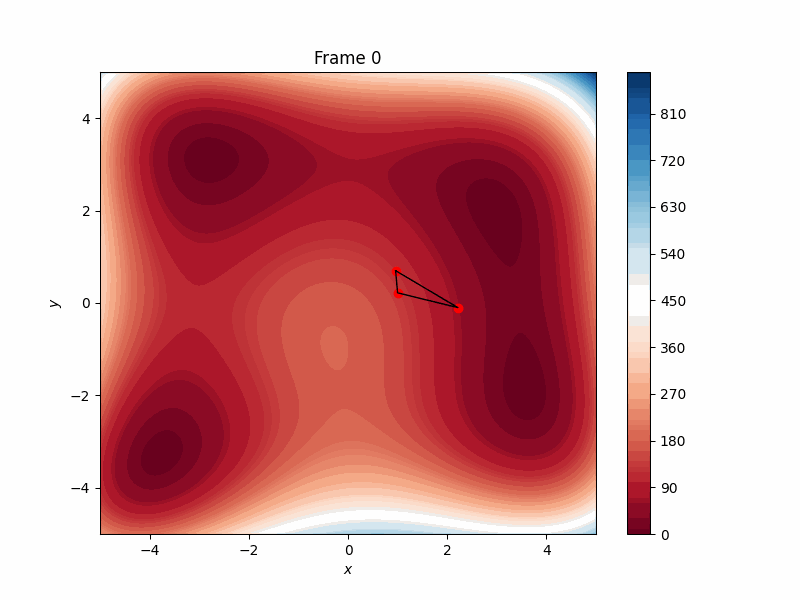

In [7]:
# Create a list to store the image filenames
filenames = []

def save_frame(points, name):
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=100, cmap='RdBu')
    plt.colorbar(cp)
    plt.title("him_fun(x, y) Contour Plot")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.scatter(points[:, 0], points[:, 1], color='red')
    points = np.vstack([points, points[0]]).copy()  
    plt.plot(points[:, 0], points[:, 1], color='black', linestyle='-', linewidth=1)

    plt.title(f"Frame {i}")

    
    plt.savefig(filename)
    plt.close()

# Create the plots and save them as images
for i in range(42):
    simplex_points = expand_contract_cases(simplex_points)
    filename = f"frame_{i}.png"
    save_frame(simplex_points, filename)
    filenames.append(filename)

gif_filename = 'NelderMeadGif.gif'
images = [Image.open(img_file) for img_file in filenames]
imageio.mimsave(gif_filename, images, duration=400, loop=0)



for filename in filenames:
    os.remove(filename)
    
IPImage(filename=gif_filename)

- Advantages:
No gradients needed
Robust, often works well for non-differentiable functions.
- Drawbacks:
Relatively slow (not applicable in high dimensions)
Not each step improves solution, only mean of corner values is reduced.
No guarantee for convergence to local optimum / stationary point.